<a href="https://colab.research.google.com/github/parth5757/pyhon_project/blob/main/urin_strip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install opencv-python-headless
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [18]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Upload the urine strip image manually in Colab
uploaded = files.upload()

Saving image3.jpg to image3 (1).jpg


In [22]:
# Load the uploaded image
image_path = list(uploaded.keys())[0]
urine_strip_image = cv2.imread(image_path)

In [23]:
# Get the width and height of the image
height, width, _ = urine_strip_image.shape

In [24]:
# Define coordinates for the regions where the colors are located
regions = [
    (0, 0, width, height // 10),
    (0, height // 10, width, height // 5),
    # ... Define coordinates for other regions ...
]

colors = {}
color_names = ['URO', 'BIL', 'KET', 'BLD', 'PRO', 'NIT', 'LEU', 'GLU', 'SG', 'PH']

for i, (x, y, w, h) in enumerate(regions):
    region = urine_strip_image[y:y + h, x:x + w]
    mean_color = np.mean(region, axis=(0, 1))
    colors[color_names[i]] = [int(channel) for channel in mean_color]

In [25]:
# Display the identified colors in the JSON format
import json
print(json.dumps(colors, indent=4))

{
    "URO": [
        163,
        168,
        175
    ],
    "BIL": [
        156,
        165,
        172
    ]
}


In [26]:
# Display the identified colors
print(colors)

{'URO': [163, 168, 175], 'BIL': [156, 165, 172]}


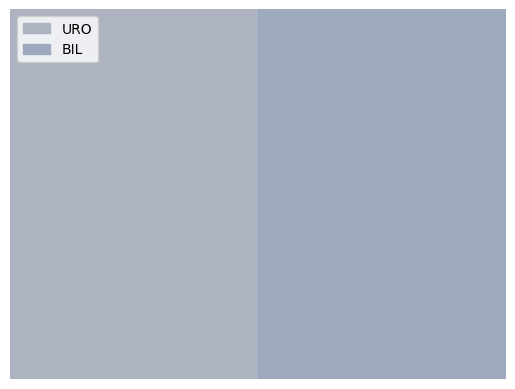

In [17]:
# Create a figure to display the identified colors
fig, ax = plt.subplots()
for i, color_name in enumerate(colors):
    color = colors[color_name]
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=[c / 255.0 for c in color], label=color_name))

ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')
plt.legend(loc='upper left')
plt.show()
